In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data = pd.read_csv('ks-projects-data.csv')

##  Access data

In [38]:
#described overview
data.describe()
data.shape

(378661, 15)

In [148]:
#view data types
data.dtypes

ID                     int64
name                  object
category              object
main_category         object
currency              object
deadline              object
goal                 float64
launched              object
pledged              float64
state                 object
backers                int64
country               object
usd pledged          float64
usd_pledged_real     float64
usd_goal_real        float64
Year                   int64
Campaign Duration      int64
campaign duration      int64
dtype: object

In [150]:
#select numeric columns
data_numeric = data.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values

print(f'NUMERIC COLUMNS: {numeric_cols}')

#select non numeric columns
data_nonnumeric = data.select_dtypes(exclude=[np.number])
non_numeric_cols = data_nonnumeric.columns.values

print(f'NON NUMERIC COLUMNS: {non_numeric_cols}')

NUMERIC COLUMNS: ['ID' 'goal' 'pledged' 'backers' 'usd pledged' 'usd_pledged_real'
 'usd_goal_real' 'Year' 'Campaign Duration' 'campaign duration'
 '% goal achieved']
NON NUMERIC COLUMNS: ['name' 'category' 'main_category' 'currency' 'deadline' 'launched'
 'state' 'country']


In [174]:
#convert the deadline and launched data to number for calculation
data['launched'] = pd.to_datetime(data['launched']).dt.date
data['deadline'] = pd.to_datetime(data['deadline']).dt.date


In [185]:
#create new data columns for analysis
data['Year'] = pd.DatetimeIndex(data['launched']).year #compute new date column for year
data['campaign duration'] = data['deadline'] - data['launched']#campaign duration in ns
data['campaign duration'] = data['campaign duration'].dt.days #convert to days
data['average pledge'] = data['usd_pledged_real'] / data['backers'] #average pledge dollar amount
data['% goal achieved'] = (data['usd_pledged_real']/ data['usd_goal_real']) * 100 #view the percentage of the goal amounts achieved

In [209]:
data.sort_values('Year', ascending=True).head(20)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,Year,Campaign Duration,campaign duration,% goal achieved,average pledge
332176,762214298,Teach the world How to Doodle,Art Books,Publishing,USD,2009-12-23,1500.0,2009-10-20,2467.99,successful,80,US,2467.99,2467.99,1500.0,2009,64,64,164.532667,30.849875
38188,1193712346,A Sci-Fi Rock Opera Short Film Written and Dir...,Shorts,Film & Video,USD,2010-02-07,12000.0,2009-11-10,370.00,failed,7,US,370.00,370.00,12000.0,2009,89,89,3.083333,52.857143
377716,995325523,Metaphysical Archaeology,Painting,Art,USD,2009-07-25,2000.0,2009-05-13,5.00,failed,1,US,5.00,5.00,2000.0,2009,73,73,0.250000,5.000000
18467,1093774966,Creating a Site for Promoting Open Source Soft...,Software,Technology,USD,2009-11-09,1000.0,2009-09-15,0.00,failed,0,US,0.00,0.00,1000.0,2009,55,55,0.000000,0.000000
343156,818187585,"Fire Up Amani's Debut EP, ""Match Play""",Pop,Music,USD,2009-12-21,2000.0,2009-09-23,2330.00,successful,32,US,2330.00,2330.00,2000.0,2009,89,89,116.500000,72.812500
187032,1952161703,Voyage to the Arctic,Art,Art,USD,2009-10-01,3000.0,2009-08-25,212.00,failed,5,US,212.00,212.00,3000.0,2009,37,37,7.066667,42.400000
139431,1708214379,Zomband: Zombie Survival Indie Game for the XB...,Video Games,Games,USD,2009-11-28,2000.0,2009-09-28,240.00,failed,10,US,240.00,240.00,2000.0,2009,61,61,12.000000,24.000000
174206,1885826919,Cities x Design,Graphic Design,Design,USD,2009-07-31,3000.0,2009-05-20,340.00,failed,6,US,340.00,340.00,3000.0,2009,72,72,11.333333,56.666667
197888,2007527213,LAKE BEAST animated short film,Animation,Film & Video,USD,2009-10-03,2000.0,2009-09-03,2025.00,successful,31,US,2025.00,2025.00,2000.0,2009,30,30,101.250000,65.322581
44276,1225079426,A copy of Tom's book has your name on it!,Nonfiction,Publishing,USD,2010-03-14,3500.0,2009-12-15,652.00,failed,13,US,652.00,652.00,3500.0,2009,89,89,18.628571,50.153846


In [177]:
data.describe() #min data for year seems off, any line items dated 1970 will be removed from the data 

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,Year,Campaign Duration,campaign duration,% goal achieved,average pledge
count,3.786540e+05,3.786540e+05,3.786540e+05,378654.000000,3.786540e+05,3.786540e+05,3.786540e+05,378654.000000,378654.000000,378654.000000,3.786540e+05,3.261340e+05
mean,1.074735e+09,4.908160e+04,9.683158e+03,105.619428,6.966297e+03,9.059092e+03,4.545514e+04,2014.248647,34.203394,34.203394,3.236180e+02,inf
std,6.190872e+08,1.183402e+06,9.563688e+04,907.193306,7.824833e+04,9.097418e+04,1.152961e+06,1.923927,12.793171,12.793171,2.669079e+04,NaN
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,2009.000000,1.000000,1.000000,0.000000e+00,4.500000e-01
25%,5.382696e+08,2.000000e+03,3.000000e+01,2.000000,1.348250e+01,3.100000e+01,2.000000e+03,2013.000000,30.000000,30.000000,4.533333e-01,2.550000e+01
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.750000e+02,6.244650e+02,5.500000e+03,2014.000000,30.000000,30.000000,1.346667e+01,4.900000e+01
75%,1.610155e+09,1.600000e+04,4.076000e+03,56.000000,3.000000e+03,4.050000e+03,1.550000e+04,2016.000000,37.000000,37.000000,1.065400e+02,8.623556e+01
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08,2018.000000,92.000000,92.000000,1.042779e+07,inf


In [178]:
data.drop(data.loc[data['Year'] == 1970].index, inplace=True) #removes the data for the year 1970

In [87]:
#find  if any data is missing per column
data.isnull().sum()

ID                   0
name                 4
category             0
main_category        0
currency             0
deadline             0
goal                 0
launched             0
pledged              0
state                0
backers              0
country              0
usd pledged          0
usd_pledged_real     0
usd_goal_real        0
Year                 0
Campaign Duration    0
campaign duration    0
dtype: int64

In [204]:
#find  if any data is missing per column
data['usd pledged'].fillna(0, inplace = True) # replacing na values 'usd pledged' with 0
data['average pledge'].fillna(0, inplace = True) # replacing na values 'usd pledged' with 0
data['name'].fillna('n/a', inplace = True) #update names where there is none

data.isnull().sum()

ID                   0
name                 0
category             0
main_category        0
currency             0
deadline             0
goal                 0
launched             0
pledged              0
state                0
backers              0
country              0
usd pledged          0
usd_pledged_real     0
usd_goal_real        0
Year                 0
Campaign Duration    0
campaign duration    0
% goal achieved      0
average pledge       0
dtype: int64

array([<AxesSubplot:ylabel='state'>], dtype=object)

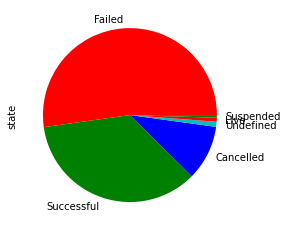

In [180]:
#create a pie plot to show how many of the proejcts are failed
data['state'].value_counts().plot.pie(labels=['Failed', 'Successful', 'Cancelled', 'Undefined', 'Live', 'Suspended'], colors=['r', 'g', 'b', 'c'],subplots=True, figsize=(8,4))


In [229]:
#will filter for failed stat and successful data
successful = data[(data['state'] == 'successful')]
failed = data[data['state'] == 'failed']
super_successful = data[(data['state'] == 'successful') & (data['% goal achieved'] > 1)]

In [250]:
super_successful.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,Year,Campaign Duration,campaign duration,% goal achieved,average pledge
count,1.339560e+05,1.339560e+05,1.339560e+05,133956.000000,1.339560e+05,1.339560e+05,1.339560e+05,133956.000000,133956.000000,133956.000000,1.339560e+05,1.339560e+05
mean,1.073727e+09,1.016296e+04,2.409978e+04,263.921362,1.734243e+04,2.267080e+04,9.532853e+03,2014.006793,32.156447,32.156447,8.557950e+02,inf
std,6.191514e+08,3.124829e+04,1.584713e+05,1504.580142,1.300727e+05,1.510903e+05,2.796144e+04,2.027528,11.771125,11.771125,4.445303e+04,NaN
min,2.110900e+04,1.000000e-02,1.000000e+00,0.000000,0.000000e+00,7.900000e-01,1.000000e-02,2009.000000,1.000000,1.000000,8.532222e+01,7.835000e-01
25%,5.354443e+08,1.250000e+03,1.977750e+03,33.000000,1.159000e+03,2.000000e+03,1.301915e+03,2012.000000,30.000000,30.000000,1.046429e+02,4.119717e+01
50%,1.076595e+09,3.923000e+03,5.117000e+03,71.000000,3.650000e+03,5.107250e+03,3.837740e+03,2014.000000,30.000000,30.000000,1.166667e+02,6.334731e+01
75%,1.608161e+09,1.000000e+04,1.344025e+04,167.000000,1.041800e+04,1.323208e+04,1.000000e+04,2016.000000,34.000000,34.000000,1.631407e+02,1.023367e+02
max,2.147476e+09,2.000000e+06,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,2.015609e+06,2017.000000,92.000000,92.000000,1.042779e+07,inf


In [248]:
successful.describe()


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,Year,Campaign Duration,campaign duration,% goal achieved,average pledge
count,1.339560e+05,1.339560e+05,1.339560e+05,133956.000000,1.339560e+05,1.339560e+05,1.339560e+05,133956.000000,133956.000000,133956.000000,1.339560e+05,1.339560e+05
mean,1.073727e+09,1.016296e+04,2.409978e+04,263.921362,1.734243e+04,2.267080e+04,9.532853e+03,2014.006793,32.156447,32.156447,8.557950e+02,inf
std,6.191514e+08,3.124829e+04,1.584713e+05,1504.580142,1.300727e+05,1.510903e+05,2.796144e+04,2.027528,11.771125,11.771125,4.445303e+04,NaN
min,2.110900e+04,1.000000e-02,1.000000e+00,0.000000,0.000000e+00,7.900000e-01,1.000000e-02,2009.000000,1.000000,1.000000,8.532222e+01,7.835000e-01
25%,5.354443e+08,1.250000e+03,1.977750e+03,33.000000,1.159000e+03,2.000000e+03,1.301915e+03,2012.000000,30.000000,30.000000,1.046429e+02,4.119717e+01
50%,1.076595e+09,3.923000e+03,5.117000e+03,71.000000,3.650000e+03,5.107250e+03,3.837740e+03,2014.000000,30.000000,30.000000,1.166667e+02,6.334731e+01
75%,1.608161e+09,1.000000e+04,1.344025e+04,167.000000,1.041800e+04,1.323208e+04,1.000000e+04,2016.000000,34.000000,34.000000,1.631407e+02,1.023367e+02
max,2.147476e+09,2.000000e+06,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,2.015609e+06,2017.000000,92.000000,92.000000,1.042779e+07,inf


In [249]:
failed.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,Year,Campaign Duration,campaign duration,% goal achieved,average pledge
count,1.977190e+05,1.977190e+05,1.977190e+05,197719.000000,197719.000000,197719.000000,1.977190e+05,197719.000000,197719.000000,197719.000000,197719.000000,1.977190e+05
mean,1.074639e+09,6.734685e+04,1.426971e+03,16.422352,1133.138949,1320.603817,6.317474e+04,2014.297351,35.173322,35.173322,9.062012,inf
std,6.192215e+08,1.447227e+06,9.564415e+03,71.224123,6220.056206,6820.249351,1.435683e+06,1.853456,13.175105,13.175105,15.182516,NaN
min,5.971000e+03,1.500000e-01,0.000000e+00,0.000000,0.000000,0.000000,1.500000e-01,2009.000000,1.000000,1.000000,0.000000,0.000000e+00
25%,5.385642e+08,2.500000e+03,3.000000e+00,1.000000,0.000000,2.640000,2.500000e+03,2013.000000,30.000000,30.000000,0.030306,1.500000e+00
50%,1.073242e+09,7.500000e+03,1.000000e+02,3.000000,66.000000,100.000000,7.500000e+03,2015.000000,30.000000,30.000000,1.714286,2.500000e+01
75%,1.611052e+09,2.000000e+04,6.710000e+02,12.000000,511.000000,663.000000,2.000000e+04,2016.000000,40.000000,40.000000,11.275000,5.507143e+01
max,2.147467e+09,1.000000e+08,1.748630e+06,6550.000000,721036.460000,757352.940000,1.663614e+08,2017.000000,92.000000,92.000000,107.970000,inf


In [272]:
successful[['category', 'main_category']].groupby('category')

In [287]:
successful.groupby('category').count()

,ID,name,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,Year,Campaign Duration,campaign duration,% goal achieved,average pledge
category,,,,,,,,,,,,,,,,,,,
3D Printing,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242
Academic,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188
Accessories,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073
Action,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107
Animals,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodworking,292,292,292,292,292,292,292,292,292,292,292,292,292,292,292,292,292,292,292
Workshops,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
World Music,922,922,922,922,922,922,922,922,922,922,922,922,922,922,922,922,922,922,922


In [339]:
successful_count = successful['main_category'].value_counts()
failed_count = failed['main_category'].value_counts()

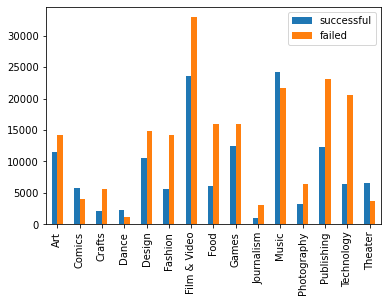

In [360]:
# successful_count.plot.bar() --- film & video and music have the highest number of project success
df= pd.DataFrame({'successful': successful_count,
                 'failed' : failed_count})

ax = df.plot.bar()

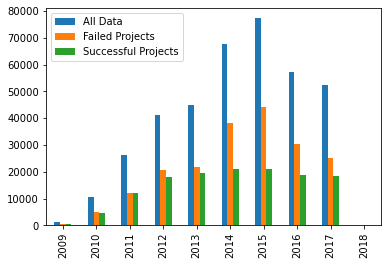

In [512]:
project_count_by_year = data['Year'].value_counts()
successful_projects_by_year = successful['Year'].value_counts()
failed_projects_by_year = failed['Year'].value_counts()

df_1= pd.DataFrame({'All Data': project_count_by_year,
                    'Failed Projects' : failed_projects_by_year,
                     'Successful Projects' : successful_projects_by_year})

ax = df_1.plot.bar()


<AxesSubplot:xlabel='campaign duration', ylabel='% goal achieved'>

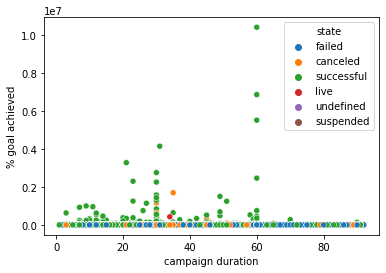

In [522]:
sns.scatterplot(data=data, x="campaign duration", y="% goal achieved", hue="state")

sns.scatterplot(data=data, x="campaign duration", y="% goal achieved", hue="state")

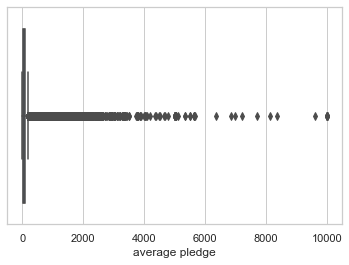

In [529]:
#evaluate the the spread among the average pledge dollar amount --- information looks strange, as average pledges are inf.
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data["average pledge"])

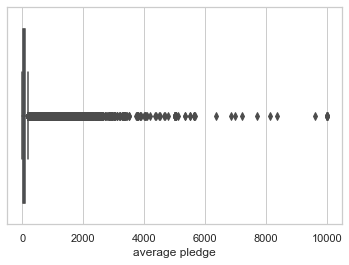

In [537]:
#evaluate the the spread among the average pledge dollar amount --- information looks strange, as average pledges are inf.
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data[data['backers'] > 0]["average pledge"])

In [540]:
data[(data['backers'] > 0) & (data['average pledge'] > 6000)]  # will look at a smaller range of data

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,Year,Campaign Duration,campaign duration,% goal achieved,average pledge
26564,113488805,"""NUIT DE LA DANSE~MADIBA"" A TRIBUTE TO NELSON ...",Film & Video,Film & Video,USD,2013-09-12,50000.0,2013-07-14,19103.0,canceled,3,US,19103.00,19103.00,50000.00,2013,60,60,38.206000,6367.666667
72925,1371284299,CosmoChron - the quality of time,Interactive Design,Design,EUR,2017-11-02,30000.0,2017-10-02,6000.0,canceled,1,AT,7088.68,6994.23,34971.15,2017,31,31,20.000000,6994.230000
90433,1459482568,Patented (9 seasons) food enhancer,Vegan,Food,USD,2016-02-22,150000.0,2016-01-23,10000.0,failed,1,US,10000.00,10000.00,150000.00,2016,30,30,6.666667,10000.000000
113947,1578763693,The Clouds - Geometry of Randomness,Conceptual Art,Art,AUD,2014-02-11,10000000.0,2013-12-13,8000.0,failed,1,AU,7212.83,7225.43,9031791.91,2013,60,60,0.080000,7225.430000
116778,1593325732,"""LIVE to SAVE"" the Greek Theatre of Syracuse",Music,Music,EUR,2016-12-21,33000.0,2016-11-11,8015.0,failed,1,IT,71.03,8372.51,34471.95,2016,40,40,24.287892,8372.510000
150995,1767293256,KIRISUTOS PACHYDERM,Animation,Film & Video,USD,2015-05-27,1000000.0,2015-03-28,10000.0,failed,1,US,10000.00,10000.00,1000000.00,2015,60,60,1.000000,10000.000000
183015,1931690384,Cooks at your home,Food,Food,USD,2016-12-31,50000.0,2016-12-01,54900.0,successful,8,US,0.00,54900.00,50000.00,2016,30,30,109.800000,6862.500000
191497,1974395971,21st CENTURY MEDICAL PRACTICE SYSTEM THAT CHAN...,Makerspaces,Technology,USD,2017-05-30,250000.0,2017-03-31,10000.0,failed,1,US,0.00,10000.00,250000.00,2017,60,60,4.000000,10000.000000
201229,2024799289,The Commoner Princess,Mobile Games,Games,USD,2016-06-03,10000.0,2016-05-04,10000.0,successful,1,US,10000.00,10000.00,10000.00,2016,30,30,100.000000,10000.000000
206741,2053322405,Sleeping in Seattle,Nonfiction,Publishing,USD,2013-10-17,9600.0,2013-09-16,9606.0,successful,1,US,9606.00,9606.00,9600.00,2013,31,31,100.062500,9606.000000


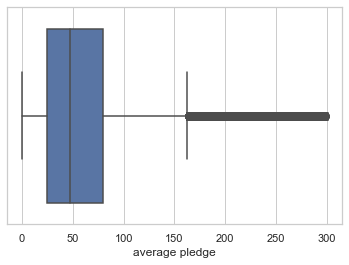

In [550]:
#evaluate the the spread among the average pledge dollar amount --- information looks strange, as average pledges are inf.
sns.set_theme(style='whitegrid')
ax = sns.boxplot(x=data[(data['backers'] > 0) & (data['average pledge'] < 300)]['average pledge'])

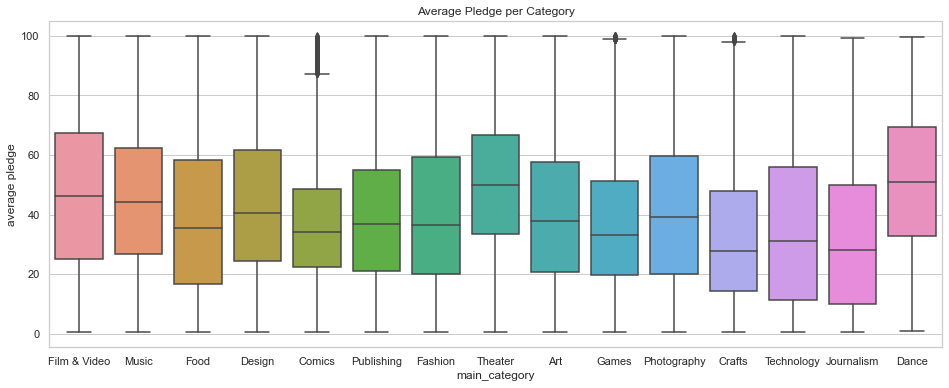

In [559]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(x='main_category', y='average pledge', data=data[(data['backers'] > 0) & (data['average pledge'] < 100)]).set_title('Average Pledge per Category')


<AxesSubplot:>

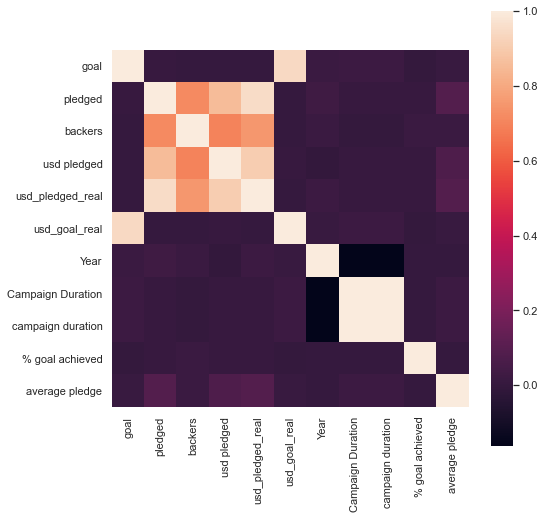

In [563]:
corr = data.select_dtypes(include = ['float64', 'int64']).iloc[:,1:].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, vmax=1, square=True)

In [549]:
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'Year',
       'Campaign Duration', 'campaign duration', '% goal achieved',
       'average pledge'],
      dtype='object')

In [567]:
corr_dict = corr['campaign duration'].to_dict()
corr_dict

{'goal': 0.023064104637248017,
 'pledged': 0.006560629333192259,
 'backers': -0.0015528251155574847,
 'usd pledged': 0.006017483761617919,
 'usd_pledged_real': 0.0070343996971297985,
 'usd_goal_real': 0.022312359796566813,
 'Year': -0.1619699886843712,
 'Campaign Duration': 1.0,
 'campaign duration': 1.0,
 '% goal achieved': 0.0022918713187518275,
 'average pledge': 0.020893933951655726}

In [595]:
#What category recieved the hightest pledge amount
data[(data['backers'] > 0)].sort_values('average pledge', ascending=False).groupby('category')[['main_category', 'backers', 'average pledge', 'usd_pledged_real']].first()

,main_category,backers,average pledge,usd_pledged_real
category,,,,
3D Printing,Technology,64,3724.793281,238386.77
Academic,Publishing,2,4505.000000,9010.00
Accessories,Fashion,2,5011.500000,10023.00
Action,Film & Video,3,1916.106667,5748.32
Animals,Photography,11,350.000000,3850.00
...,...,...,...,...
Woodworking,Crafts,7,1237.000000,8659.00
Workshops,Dance,3,858.300000,2574.90
World Music,Music,2,1425.000000,2850.00


In [592]:
#What category recieved the hightest pledge amount
data[(data['backers'] > 0)].sort_values('average pledge', ascending=False).groupby('main_category')[['backers', 'average pledge', 'usd_pledged_real']].first()

,backers,average pledge,usd_pledged_real
main_category,,,
Art,1,7225.430000,7225.43
Comics,15,1126.666667,16900.00
Crafts,1,1897.360000,1897.36
Dance,4,2377.500000,9510.00
Design,1,6994.230000,6994.23
Fashion,1,7719.860000,7719.86
Film & Video,1,10000.000000,10000.00
Food,1,10000.000000,10000.00
Games,1,10000.000000,10000.00
